In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression1    
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Loading the dataset

In [55]:
df = pd.read_csv('StudentsPerformance.csv')

# Understanding the Data

In [56]:
print(df.head(5))
print(df.shape)
print(df.info())
print(df.describe())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null C

In [57]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


there are no missing values in the dataset, hence we will move forward to encoding the categorical variables


In [58]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [59]:
#Label Encoding for binary categorical variables
le = LabelEncoder()
binary_cols = ['gender', 'lunch', 'test preparation course']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

#One-hot encoding for multi-class categorical variables

df = pd.get_dummies(df, columns = ['race/ethnicity', 'parental level of education'], drop_first=True)

creating a new column named avg_score and at_risk

In [60]:
avg_score = (df['math score']+ df['reading score']+ df['writing score'])/3
df['avg_score'] = avg_score

at_risk = np.where(df['avg_score']<40, 1, 0)
df['at_risk'] = at_risk

In [61]:
df

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,avg_score,at_risk
0,0,1,1,72,72,74,True,False,False,False,True,False,False,False,False,72.666667,0
1,0,1,0,69,90,88,False,True,False,False,False,False,False,True,False,82.333333,0
2,0,1,1,90,95,93,True,False,False,False,False,False,True,False,False,92.666667,0
3,1,0,1,47,57,44,False,False,False,False,False,False,False,False,False,49.333333,0
4,1,1,1,76,78,75,False,True,False,False,False,False,False,True,False,76.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,88,99,95,False,False,False,True,False,False,True,False,False,94.000000,0
996,1,0,1,62,55,55,False,True,False,False,False,True,False,False,False,57.333333,0
997,0,0,0,59,71,65,False,True,False,False,False,True,False,False,False,65.000000,0
998,0,1,0,68,78,77,False,False,True,False,False,False,False,True,False,74.333333,0


# Model Building

a. Splitting the data

In [77]:
#We will Fix overfitting by removing features that directly contribute to target calculation, that is the math, reading and writing scores

X = df.drop(columns=['at_risk', 'math score', 'reading score', 'writing score'])
y = df['at_risk']

#Spliting the data again with proper features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

b. Training Logistic Regression and Random Forest

In [72]:
from sklearn.model_selection import cross_val_score

#Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

#Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Cross-validation scores
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Results (5-fold):")
print(f"Logistic Regression CV Accuracy: {log_reg_cv_scores.mean():.4f} (+/- {log_reg_cv_scores.std() * 2:.4f})")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

Cross-Validation Results (5-fold):
Logistic Regression CV Accuracy: 0.9980 (+/- 0.0049)
Random Forest CV Accuracy: 0.9980 (+/- 0.0049)


# Evaluation

a. Confusion Matrix and Classification Report

Logistic Regression - Accuracy: 1.0000 (100.00%)
Logistic Regression-  Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



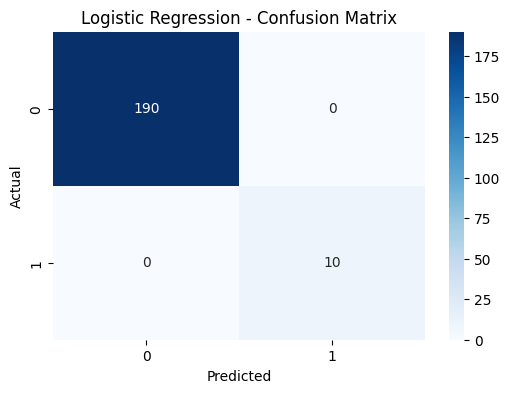

Random Forest - Accuracy: 1.0000 (100.00%)
Random Forest-  Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



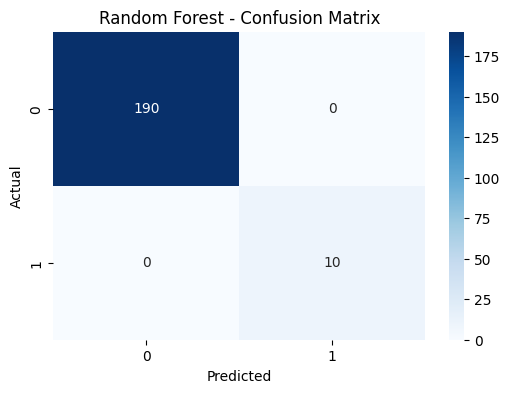

In [74]:
#Evaluation part - defining the function
def evaluate_model(name, y_true, y_pred):
    from sklearn.metrics import accuracy_score
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"{name}-  Classification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted') 
    plt.ylabel('Actual')
    plt.show()

#prediction using both the models
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)

#Evaluation using the function
evaluate_model("Logistic Regression", y_test, log_reg_pred)
evaluate_model("Random Forest", y_test, rf_pred)

**Confusion Matrix Interpretation**

Logistic Regression Confusion Matrix:
- True Negatives: 190 - Students correctly predicted as "not at risk" who actually passed
- False Positives: 0 - Students incorrectly predicted as "at risk" who actually passed
- False Negatives: 0 - Students incorrectly predicted as "not at risk" who actually failed/dropped out
- True Positives: 10 - Students correctly predicted as "at risk" who actually failed/dropped out

Random Forest Confusion Matrix:
- True Negatives: 190 - Students correctly predicted as "not at risk" who actually passed
- False Positives: 0 - Students incorrectly predicted as "at risk" who actually passed  
- False Negatives: 0 - Students incorrectly predicted as "not at risk" who actually failed/dropped out
- True Positives: 10 - Students correctly predicted as "at risk" who actually failed/dropped out

b. Feature Importance

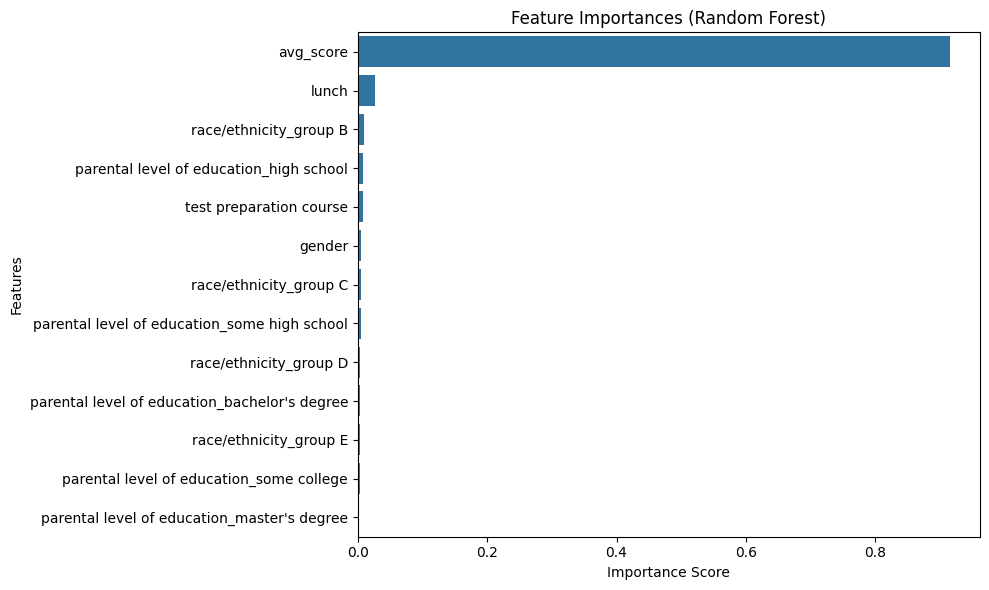

Feature Importance Rankings:
1. avg_score: 0.9161
2. lunch: 0.0274
3. race/ethnicity_group B: 0.0098
4. parental level of education_high school: 0.0085
5. test preparation course: 0.0082
6. gender: 0.0056
7. race/ethnicity_group C: 0.0054
8. parental level of education_some high school: 0.0049
9. race/ethnicity_group D: 0.0036
10. parental level of education_bachelor's degree: 0.0036
11. race/ethnicity_group E: 0.0033
12. parental level of education_some college: 0.0030
13. parental level of education_master's degree: 0.0005


In [76]:
# Feature importance for Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Sort by importance
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

print("Feature Importance Rankings:")
for i, (feature, importance) in enumerate(feat_importance.items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")

In [ ]:
#Checking the distribution of students at risk vs not at risk
print("Student Risk Distribution:")
print(f"{(y == 0).sum()} students are not at risk, which means they passed")
print(f"{(y == 1).sum()} students at risk, which means they failed/dropped out")
print(f"\nTotal students: {len(y)}")
print(f"Percentage not at risk: {(y == 0).sum() / len(y) * 100:.1f}%")
print(f"Percentage at risk: {(y == 1).sum() / len(y) * 100:.1f}%")

Student Risk Distribution:
970 students are not at risk, which means they passed
30 students at risk, which means they failed/dropped out

Total students: 1000
Percentage not at risk: 97.0%
Percentage at risk: 3.0%


1. How many students passed, failed, or dropped out?
970 students are not at risk, which means they passed 
30 students at risk, which means they failed/dropped out

2. Which model performs better on accuracy?
both the models are giving 100% accuracy, showing perfect performance

3. Which 3 features most influence success?
from the graph above, we see that avg_score is by far the highest feature with 0.9161 importance, followed by lunch with 0.0274 and race/ethnicity group B with 0.0098, hence it shows that these 3 features best influence the success

4. What features most influenced the student's predicted outcome?
again, the most influential feature is clearly avg_score which dominates with over 90% importance, followed by lunch program participation and race/ethnicity, with other demographic factors having much smaller contributions

5. If gender or parental education is an important predictor, should it be used in decisions? Why or why not?
no, parental education appears as a predictor but with very low importance (around 0.008). gender also shows some importance (0.0056) but using it for decisions could lead to discrimination. it is better to focus on actionable factors like providing support programs

6. Propose one way this model could help the academic team support struggling students before they fail or drop out.
by using the above models they are able to clearly see the stats of the various attributes affecting students pass rate and fail rate, so having an analysis on that and seeing what factors affect the most and what can control them can help the support team make proper decisions and help the students in the best way possible. we can clearly see how avg_score dominates the prediction, but looking at other factors like lunch program (socioeconomic status) and parental education can help the team focus on providing additional support to students from disadvantaged backgrounds

**Interpretation and Ethics**

a. Interpret your model responsibly

Our model shows 100% accuracy which indicates overfitting, primarily because avg_score (which directly calculates the target variable) dominates with 91.6% feature importance. This means the model is essentially memorizing the relationship between average test scores and the at-risk classification rather than learning meaningful patterns from demographic factors.

While the model performs perfectly on our dataset, this high accuracy is misleading and not generalizable to new students. The features (lunch program, race/ethnicity, parental education) show much lower importance scores, suggesting that socioeconomic and background factors have predictive value but are overshadowed by the direct academic performance measure.

For responsible interpretation, we should focus on the secondary features that provide actionable insights rather than relying on the overfitted performance metrics.

b. Use case

This model can be used by academic institutions for early intervention programs, specifically:

**Primary Use Case: Socioeconomic Risk Assessment**
the model can be used to identify students from disadvantaged backgrounds who may need additional support. since lunch program participation shows as the second most important feature after avg_score, it acts as a good socioeconomic indicator. race/ethnicity and parental education levels also provide additional context for creating targeted support programs for students who need help.

**Ethical Considerations:**
when using demographic features like race and parental education for decisions, there are fairness concerns that need to be addressed. the model should always be used to provide additional resources and support to students, not to limit their opportunities or discriminate against them. we need to regularly monitor the system to ensure it doesn't perpetuate existing inequalities in education. the focus should always be on actionable interventions that help students rather than just predictive labeling that might stigmatize them.

**Recommended Implementation:**
the model can be used to identify students who would benefit from tutoring programs, financial aid, or academic counseling services. however, model insights should always be combined with human judgment and individual student circumstances because every student is unique. we need to ensure transparency in how decisions are made and provide appeals processes for students who feel they've been unfairly assessed. it's also important to regularly audit the system for bias and update the model to maintain fairness across different student groups.